In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
# ---------------- Load Data ----------------
# Read the hourly mean data from CSV file
df = pd.read_csv("hourly_mean.csv")

# Remove the 'Day' column and keep only the 24 hourly values for modeling
data = df.iloc[:, 1:].values   # shape (D, 24)
D = data.shape[0]

# ---------------- Scaling ----------------
# Normalize the data to [0, 1] range for neural network training
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [15]:
# ---------------- Function: Build sequences ----------------
def create_sequences(data, lookback):
    """
    Generates input/output sequences for time series modeling.

    Parameters:
        data (np.ndarray): Scaled input data of shape (num_days, num_features).
        lookback (int): Number of previous days to use for each input sequence.

    Returns:
        X (np.ndarray): Input sequences of shape (num_samples, lookback, num_features).
        y (np.ndarray): Output targets of shape (num_samples, num_features).
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        # Collect sequences of 'lookback' days as input
        X.append(data[i - lookback:i])
        # The target is the next day's data
        y.append(data[i])
    return np.array(X), np.array(y)

# ---------------- Function: Build LSTM Model ----------------
def build_model(lookback):
    """
    Constructs and compiles an LSTM-based neural network for multivariate time series prediction.

    Parameters:
        lookback (int): Number of time steps in each input sequence.

    Returns:
        model (Sequential): Compiled Keras Sequential model.
    """
    model = Sequential([
        # LSTM layer with 64 units; expects input shape (lookback, 24 features)
        LSTM(64, activation="tanh", input_shape=(lookback, 24)),
        # Output layer for 24 hourly predictions
        Dense(24)
    ])
    # Compile the model with Adam optimizer and mean squared error loss
    model.compile(optimizer="adam", loss="mse")
    return model

In [16]:
# ---------------- Loop over lookbacks ----------------
rmse_list = []
acc_list = []
lookbacks = range(1, 21)

for lb in lookbacks:
    print(f"\nTraining with lookback = {lb} days")

    # Generate input/output sequences for the current lookback window
    X, y = create_sequences(data_scaled, lb)

    # Split data into training and testing sets (70% train, 30% test)
    split_idx = int(0.7 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Build and compile the LSTM model for the current lookback
    model = build_model(lb)

    # Train the model for a limited number of epochs to save time
    model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=16,
        verbose=0
    )

    # Predict on the test set
    y_pred = model.predict(X_test, verbose=0)

    # Inverse transform predictions and targets to original scale
    y_test_inv = scaler.inverse_transform(y_test)
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Flatten arrays for error calculation
    y_true_flat = y_test_inv.flatten()
    y_pred_flat = y_pred_inv.flatten()

    # Calculate RMSE
    mse = mean_squared_error(y_true_flat, y_pred_flat)
    rmse = np.sqrt(mse)

    # Calculate MAPE and derive accuracy
    mape = np.mean(np.abs((y_true_flat - y_pred_flat) / y_true_flat)) * 100
    accuracy = 100 - mape

    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test Accuracy: {accuracy:.2f}%")

    # Store results for later analysis and plotting
    rmse_list.append(rmse)
    acc_list.append(accuracy)


Training with lookback = 1 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 22.14
Test Accuracy: 81.30%

Training with lookback = 2 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 18.04
Test Accuracy: 85.55%

Training with lookback = 3 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 18.07
Test Accuracy: 85.41%

Training with lookback = 4 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 18.22
Test Accuracy: 85.63%

Training with lookback = 5 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 16.11
Test Accuracy: 86.93%

Training with lookback = 6 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.25
Test Accuracy: 87.57%

Training with lookback = 7 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 15.36
Test Accuracy: 87.44%

Training with lookback = 8 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.31
Test Accuracy: 87.63%

Training with lookback = 9 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.21
Test Accuracy: 87.92%

Training with lookback = 10 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 17.56
Test Accuracy: 86.16%

Training with lookback = 11 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 15.37
Test Accuracy: 87.55%

Training with lookback = 12 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.59
Test Accuracy: 87.79%

Training with lookback = 13 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 16.94
Test Accuracy: 86.68%

Training with lookback = 14 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.83
Test Accuracy: 86.88%

Training with lookback = 15 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 16.09
Test Accuracy: 86.83%

Training with lookback = 16 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 18.58
Test Accuracy: 85.28%

Training with lookback = 17 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 13.85
Test Accuracy: 87.93%

Training with lookback = 18 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 15.38
Test Accuracy: 87.32%

Training with lookback = 19 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.52
Test Accuracy: 87.59%

Training with lookback = 20 days


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 14.32
Test Accuracy: 87.78%


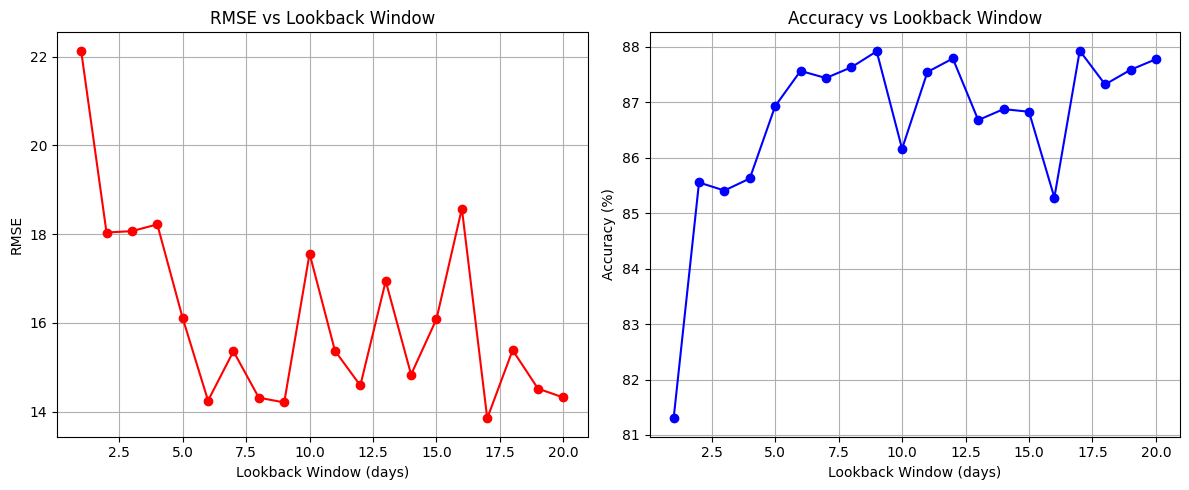

In [17]:
# ---------------- Plot RMSE and Accuracy vs Lookback Window ----------------
plt.figure(figsize=(12, 5))

# Plot RMSE for each lookback window
plt.subplot(1, 2, 1)
plt.plot(lookbacks, rmse_list, marker='o', color='red')
plt.xlabel("Lookback Window (days)")
plt.ylabel("RMSE")
plt.title("RMSE vs Lookback Window")
plt.grid(True)

# Plot Accuracy for each lookback window
plt.subplot(1, 2, 2)
plt.plot(lookbacks, acc_list, marker='o', color='blue')
plt.xlabel("Lookback Window (days)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs Lookback Window")
plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()